In [5]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

ny_off_2013_df= pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv')
print(ny_off_2013_df)

                           City Population Violent\ncrime  Murder Rape  \
0                 Adams Village      1,861              0       0    0   
1      Addison Town and Village      2,577              3       0    0   
2                 Akron Village      2,846              3       0    0   
3                        Albany     97,956            791       8   30   
4                Albion Village      6,388             23       0    3   
5                Alfred Village      4,089              5       0    0   
6              Allegany Village      1,781              3       0    0   
7                  Amherst Town    118,296            107       1    7   
8            Amityville Village      9,519              9       0    2   
9                     Amsterdam     18,182             30       0    0   
10               Arcade Village      2,053              0       0    0   
11              Ardsley Village      4,523              5       0    0   
12            Asharoken Village       

𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒 = 𝛼 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2 + 𝑀𝑢𝑟𝑑𝑒𝑟 + 𝑅𝑜𝑏𝑏𝑒𝑟𝑦

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:



In [6]:
ny_off_2013_df['Population']=(ny_off_2013_df['Population']).str.replace(",", "")
ny_off_2013_df['Population']=(ny_off_2013_df['Population']).apply(pd.to_numeric)

ny_off_2013_df['population_squared']=(ny_off_2013_df['Population'])**2

In [22]:
#cleaning
#ny_off_2013_df['Burglary']=(ny_off_2013_df['Burglary']).str.replace(",", "")
ny_off_2013_df['Burglary']=(ny_off_2013_df['Burglary']).apply(pd.to_numeric)

#ny_off_2013_df['Larceny']=(ny_off_2013_df['Larceny']).str.replace(",", "")
ny_off_2013_df['Larceny']=(ny_off_2013_df['Larceny']).apply(pd.to_numeric)

#ny_off_2013_df['motorvehicletheft']=(ny_off_2013_df['motorvehicletheft']).str.replace(",", "")
ny_off_2013_df['motorvehicletheft']=(ny_off_2013_df['motorvehicletheft']).apply(pd.to_numeric)
    
#ny_off_2013_df['Robbery']=(ny_off_2013_df['Robbery']).str.replace(",", "")
ny_off_2013_df['Robbery']=(ny_off_2013_df['Robbery']).apply(pd.to_numeric)

#ny_off_2013_df['Propertycrime']=(ny_off_2013_df['Propertycrime']).str.replace(",", "")
ny_off_2013_df['Propertycrime']=(ny_off_2013_df['Propertycrime']).apply(pd.to_numeric)


robbery_binary=[]

for row in ny_off_2013_df['Robbery']:
    if row >= 1:
        robbery_binary.append('1')
    elif row == 0:
        robbery_binary.append('0')
    #create a column based on this output
ny_off_2013_df['robbery_binary'] = robbery_binary

Text(0, 0.5, 'Population')

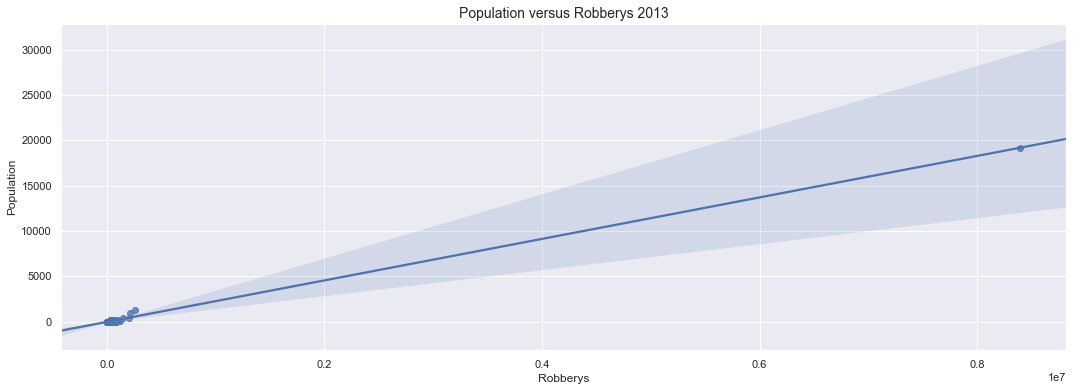

In [23]:
plt.figure(figsize=(18,6))


sns.set(style="darkgrid")
sns.regplot(ny_off_2013_df['Population'], ny_off_2013_df['Robbery'])
plt.title('Population versus Robberys 2013', fontsize=14)
plt.xlabel('Robberys')
plt.ylabel('Population')


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Population')

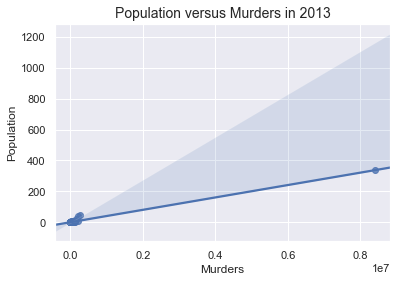

In [9]:
sns.set(style="darkgrid")
sns.regplot(ny_off_2013_df['Population'], ny_off_2013_df['Murder'])
plt.title('Population versus Murders in 2013', fontsize=14)
plt.xlabel('Murders')
plt.ylabel('Population')

One of these values seem to be for an area that is much bigger than the others. Hypothesize, it's Manhattan/Downtown New York...on further inspection that turns out to be the case. Opt to leave in for now. May consider removing for modelling later.

For this analyses, i'm going to focus on predicting property crimes in the greater New York metropolitan area with the exclusion of downtown/central New York/Manhattan. Certain phenomena that pertain specifically to Manhattan and not to the rest of greater New York mean that the data for this area may not be comparable to the rest and may bias or skew the data. Specifically, the population of Manhattan increases during the day due to an influx of individuals and it would be reasonable to hypothesize that this has an impact on crime rates. 

In [10]:
ny_off_2013_exman_df = ny_off_2013_df.drop(ny_off_2013_df[ny_off_2013_df.City == 'New York'].index)


In [11]:
print(ny_off_2013_exman_df)

                           City  Population Violent\ncrime  Murder Rape  \
0                 Adams Village        1861              0       0    0   
1      Addison Town and Village        2577              3       0    0   
2                 Akron Village        2846              3       0    0   
3                        Albany       97956            791       8   30   
4                Albion Village        6388             23       0    3   
5                Alfred Village        4089              5       0    0   
6              Allegany Village        1781              3       0    0   
7                  Amherst Town      118296            107       1    7   
8            Amityville Village        9519              9       0    2   
9                     Amsterdam       18182             30       0    0   
10               Arcade Village        2053              0       0    0   
11              Ardsley Village        4523              5       0    0   
12            Asharoken V

In [25]:
ny_off_2013_exman_df['Propertycrime']=(ny_off_2013_df['Propertycrime']).apply(pd.to_numeric)
ny_off_2013_exman_df['Burglary']=(ny_off_2013_df['Burglary']).apply(pd.to_numeric)
ny_off_2013_exman_df['Larceny']=(ny_off_2013_df['Larceny']).apply(pd.to_numeric)
ny_off_2013_exman_df['motorvehicletheft']=ny_off_2013_exman_df['motorvehicletheft'].apply(pd.to_numeric)




Text(0.5, 1.0, 'Population versus Property Crimes 2013')

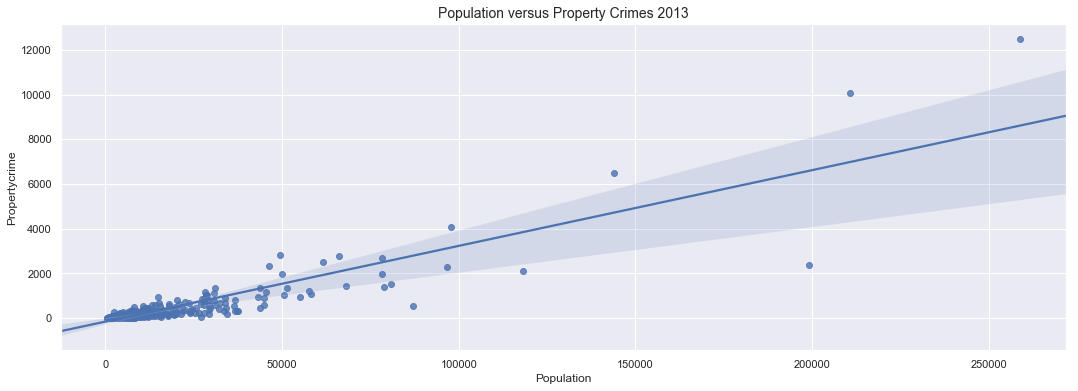

In [26]:
plt.figure(figsize=(18,6))


sns.set(style="darkgrid")
sns.regplot(ny_off_2013_exman_df['Population'], ny_off_2013_exman_df['Propertycrime'])
plt.title('Population versus Property Crimes 2013', fontsize=14)




Ok, population looks somewhat predictive. Residual accoutns seems relatively normal.

Most likely scenario is that I included population as a variable and I either transform it, or account for the effect of increase population elsewhere in the regression.

In [13]:
#transform population variables
ny_off_2013_exman_df['pop_sq_rt']= [math.sqrt(x) for x in ny_off_2013_exman_df['Population']]

ny_off_2013_exman_df['pop_squared'] = [math.pow(x, 2) for x in  ny_off_2013_exman_df['Population']]



None of these look much better, i'm going to try to include some more variables in the model. Once other variables are accounted, their weighting will normalize the effect of larger population somewhat. I predict that non-violent crimes will correlate the strongest. Let's take a look at larceny, vehicle theft, burglary

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Vehicle Theft versus Property Crimes 2013')

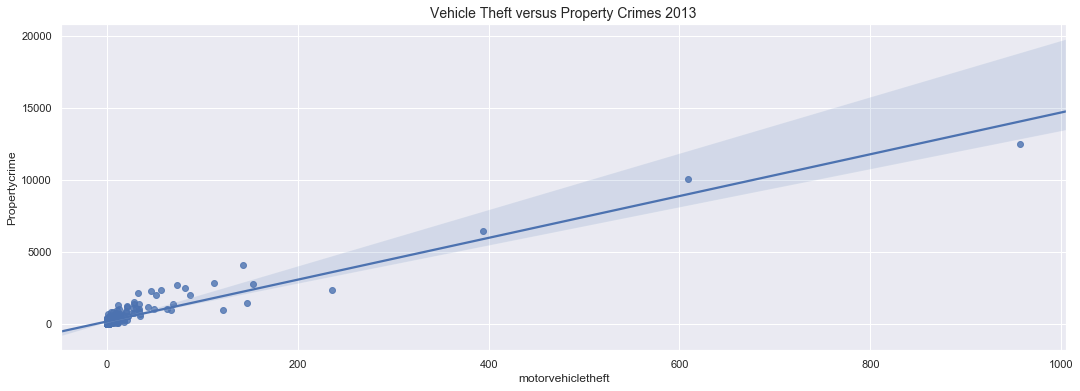

In [49]:
plt.figure(figsize=(18,6))


sns.set(style="darkgrid")
sns.regplot(ny_off_2013_exman_df['motorvehicletheft'], ny_off_2013_exman_df['Propertycrime'])
plt.title('Vehicle Theft versus Property Crimes 2013', fontsize=14)

This correlates nicely, i'm going to add to the model.

Text(0.5, 1.0, 'Burglary versus Property Crimes 2013')

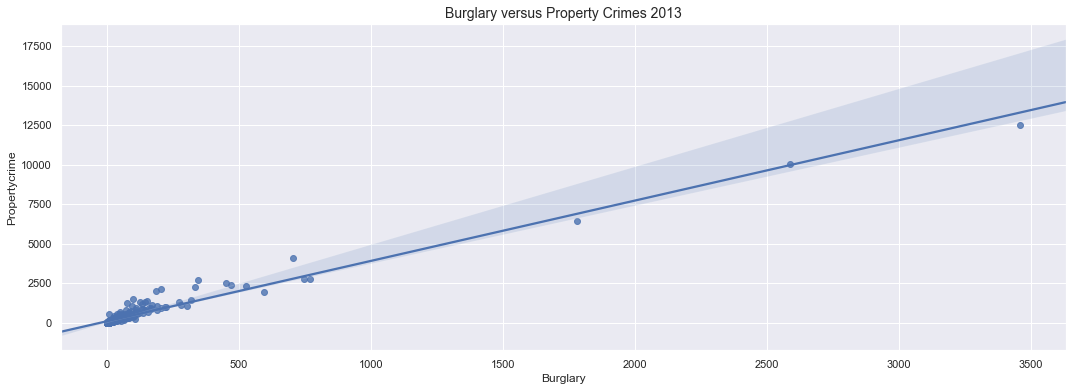

In [50]:
plt.figure(figsize=(18,6))


sns.set(style="darkgrid")
sns.regplot(ny_off_2013_exman_df['Burglary'], ny_off_2013_exman_df['Propertycrime'])
plt.title('Burglary versus Property Crimes 2013', fontsize=14)

Also correlates nicely.

Text(0.5, 1.0, 'Vehicle Theft versus Property Crimes 2013')

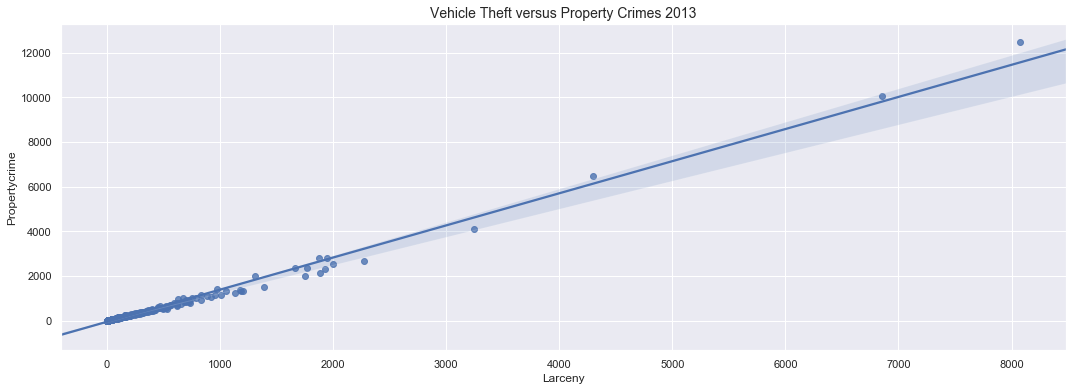

In [51]:
plt.figure(figsize=(18,6))


sns.set(style="darkgrid")
sns.regplot(ny_off_2013_exman_df['Larceny'], ny_off_2013_exman_df['Propertycrime'])
plt.title('Larceny versus Property Crimes 2013', fontsize=14)

In [31]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = ny_off_2013_exman_df['Propertycrime'].values.reshape(-1, 1)
X = ny_off_2013_exman_df[['Population','Larceny','motorvehicletheft']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-1.95839623e-03  1.19274134e+00  3.60467040e+00]]

Intercept: 
 [7.8047192]

R-squared:
0.9986653805954459


It is not necessary, and may result in overfitting, but normalizing the effect of population size on larceny and mother vehicle theft may further improve R-Squared value of model. Let's try this:

In [35]:
ny_off_2013_exman_df['inversepop']=(1/ny_off_2013_exman_df['Population'])

In [56]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = ny_off_2013_exman_df['Propertycrime'].values.reshape(-1, 1)
X = ny_off_2013_exman_df[['inversepop','Larceny','motorvehicletheft']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.30796260e+04 1.13121200e+00 3.56037221e+00]]

Intercept: 
 [-7.56881688]

R-squared:
0.9981822401875481


This marginally improves the model. Let's do a final check and make sure the assumptions we have made in this model are sound:

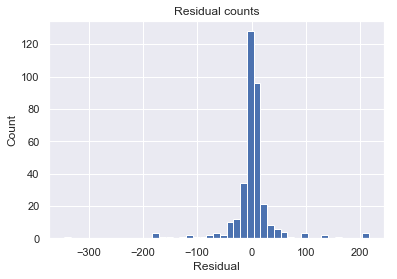

In [58]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = ny_off_2013_exman_df['Propertycrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual, bins=45)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

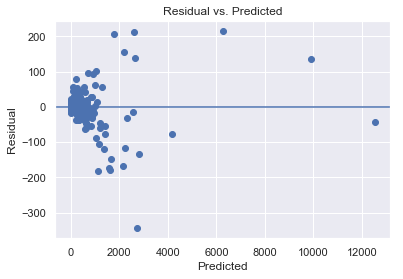

In [59]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


Residuals look normally distributed and there is relative homoscedascity.

# Test and validate model using data from 2014

Before we test the model on the 2014 data, let's cross validate it within the same dataset.

In [36]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
split2013_1, split2013_2 = train_test_split(ny_off_2013_exman_df, test_size=0.2, random_state=20)


## Test 1

In [37]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = split2013_1['Propertycrime'].values.reshape(-1, 1)
X = split2013_1[['inversepop','Larceny','motorvehicletheft']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.46344159e+04 1.14569583e+00 3.44050175e+00]]

Intercept: 
 [-9.35193673]

R-squared:
0.9985382686225663


## Test 2

In [56]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = split2013_2['Propertycrime'].values.reshape(-1, 1)
X = split2013_2[['inversepop','Larceny','motorvehicletheft']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-5.88232570e+03  1.08723141e+00  3.52307049e+00]]

Intercept: 
 [5.82612031]

R-squared:
0.9940532168539645


Cross validation was succesful. There is no need to do an F-Test here, our model is highly predictive. Let's make sure that all the parameters are adding significant predictive capacity to the model:

In [39]:
# ready 
formulafortest = 'Propertycrime ~ inversepop+Larceny+motorvehicletheft'

# Fit the model to our data using the formula.
lm = smf.ols(formula=formulafortest, data=ny_off_2013_exman_df).fit()

lm.pvalues

Intercept           0.055
inversepop          0.156
Larceny             0.000
motorvehicletheft   0.000
dtype: float64

Looks like I can probably go ahead and take inverse population out of the model. Otherwise,  everything looks good.

In [4]:
ny_2014_df= pd.read_csv('newyork2014.csv')
print(ny_2014_df)

                                City Population violentcrime  murder rape_1  \
0                      Adams Village      1,851            0   0.000    NaN   
1           Addison Town and Village      2,568            2   0.000    NaN   
2                      Afton Village        820            0   0.000      0   
3                      Akron Village      2,842            1   0.000    NaN   
4                             Albany     98,595          802   8.000     54   
5                     Albion Village      5,872           26   0.000      3   
6            Alexandria Bay Village4      1,107            0   0.000      0   
7                    Alfred Village4      4,032           11   1.000      1   
8                  Altamont Village4      1,723            1   0.000      0   
9                      Amherst Town4    118,860          128   1.000     16   
10   Amity Town and Belmont Village4      2,250            0   0.000      0   
11                Amityville Village      9,509     

In [67]:
#clean
#remove entries remove 369-375

ny_2014_df=ny_2014_df.drop(ny_2014_df.index[369:376])


#fix city names
ny_2014_df['City']=(ny_2014_df['City']).str.replace("4", "")

#get rid of commas

#ny_2014_df['Population']=(ny_2014_df['Population']).str.replace(",", "")

#ny_2014_df['propertycrime']=(ny_2014_df['propertycrime']).str.replace(",", "")

#ny_2014_df['motorvehicletheft']=(ny_2014_df['motorvehicletheft']).str.replace(",", "")

#ny_2014_df['larcenytheft']=(ny_2014_df['larcenytheft']).str.replace(",", "")

#change type

ny_2014_df['Population']=(ny_2014_df['Population']).apply(pd.to_numeric)

ny_2014_df['propertycrime']=(ny_2014_df['propertycrime']).apply(pd.to_numeric)

ny_2014_df['motorvehicletheft']=(ny_2014_df['motorvehicletheft']).apply(pd.to_numeric)

ny_2014_df['larcenytheft']=(ny_2014_df['larcenytheft']).apply(pd.to_numeric)

#make inverse population feature
ny_2014_df['inversepop']=1/ny_2014_df['Population']

#replace nan with 0

ny_2014_df=ny_2014_df.fillna(0)

In [68]:
print(ny_2014_df['propertycrime'])

0       11.000
1       49.000
2        1.000
3       17.000
4     3888.000
5      204.000
6        7.000
7       30.000
8        2.000
9     2066.000
10       0.000
11     198.000
12     490.000
13       6.000
14      25.000
15      25.000
16       6.000
17      12.000
18      14.000
19      65.000
20      73.000
21     599.000
22     148.000
23     245.000
24     123.000
25     454.000
26    2048.000
27       3.000
28      86.000
29       9.000
        ...   
339     15.000
340    580.000
341     89.000
342    506.000
343     75.000
344     75.000
345     59.000
346     58.000
347    154.000
348   1296.000
349    199.000
350    103.000
351     20.000
352    496.000
353     21.000
354    156.000
355      9.000
356     33.000
357    764.000
358     44.000
359   1046.000
360     41.000
361     71.000
362     18.000
363      4.000
364      0.000
365     43.000
366   2009.000
367    209.000
368      1.000
Name: propertycrime, Length: 369, dtype: float64


In [69]:
# Instantiate and fit our model without inversepop.
newregr = linear_model.LinearRegression()
Y = ny_2014_df['propertycrime'].values.reshape(-1, 1)
X = ny_2014_df[['larcenytheft','motorvehicletheft']]
newregr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', newregr.coef_)
print('\nIntercept: \n', newregr.intercept_)
print('\nR-squared:')
print(newregr.score(X, Y))


Coefficients: 
 [[0.899086   4.53877581]]

Intercept: 
 [36.08530655]

R-squared:
0.9998760949848398


In [71]:
# Instantiate and fit our model without inversepop.
oldregr = linear_model.LinearRegression()
Y = ny_2014_df['propertycrime'].values.reshape(-1, 1)
X = ny_2014_df[['inversepop','larcenytheft','motorvehicletheft']]
oldregr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', oldregr.coef_)
print('\nIntercept: \n', oldregr.intercept_)
print('\nR-squared:')
print(oldregr.score(X, Y))


Coefficients: 
 [[-1.61791654e+04  8.97973184e-01  4.55376173e+00]]

Intercept: 
 [41.20194143]

R-squared:
0.999878850633428


# Final Analysis

The changes to the model are as follows:

The first models were simple bivariate regressions that included non-violent crimes and population. The first change I made was to omit central New York as a datapoint, I reasoned that New York could not be compared to the other towns/suburbs/areas in the dataset due to it's size and the fact that it's residential population is not reflective of the city's true daily population (due to commuters, tourists and other visitors). On the basis of the results of these regressions, I utilized population, larceny and motor vehicle thefts in my first model. The results yielded an R-squared of 0.998 indicating that the model fit the data well. The residual counts were normally distributed and the model showed an acceptable level of scedascity. 

In the second iteration of this model I used the inverse of population in order to attempt to normalize the larceny and motor vehicle theft data for the affect of higher population. I did this as a I reasoned that the effect of population was already baked into the larceny and motor vehicle theft data. This did not make a sizeable difference in the R-squared value for model. To confirm I did t-test on the parameters; The results of this analysis showed the p-value for the inverse population parameter was >0.15, as the parameter did not reach the pre-set significance cut off of 0.05, I decided to omit it from the model.

As a final check, before creating the final model I cross validated the model on the 2013 data, both tests in the cross validation showed the same results. In the final iteration, I omitted inverse population and tested the model on both the 2013 and 2014 data. The model showed a high R-squared in both cases (>0.98) and met the assumptions of the model.